To run this notebook, download the YOLO V3 weights and convert them using the command:

```
wget https://pjreddie.com/media/files/yolov3.weights -O weights/yolov3.weights

python convert.py --weights weights/yolov3.weights --output weights/yolov3.tf
```

# **Imports**

In [1]:
import time
from absl import app, flags, logging
from absl.flags import FLAGS
import cv2
import numpy as np
import tensorflow as tf
from models import YoloV3
from utils import draw_outputs, transform_images
import matplotlib.pyplot as plt

CLASSES_PATH = './coco.names'
WEIGHTS_PATH = './weights/yolov3.tf'
IMAGE_SIZE = 416

# **Load the model, the classes and the example image**

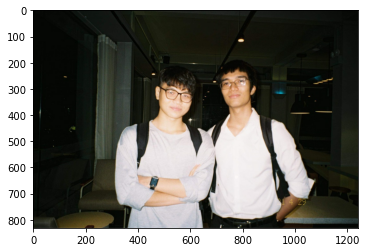

In [15]:
yolo = YoloV3()
yolo.load_weights(WEIGHTS_PATH)
class_names = [c.strip() for c in open(CLASSES_PATH).readlines()]

img = tf.image.decode_image(open('./res/two_people.jpg', 'rb').read(), channels=3)
plt.imshow(img)
plt.show()

input_img = tf.expand_dims(img, 0)
input_img = transform_images(input_img, IMAGE_SIZE)

# **Run inference and display result**

	person, 0.9921198487281799, [0.25531533 0.25503758 0.55986917 0.95190775]
	person, 0.9537708163261414, [0.50941175 0.2211009  0.84464544 0.98761916]
	chair, 0.5833762288093567, [0.12779538 0.67347836 0.287516   0.9892647 ]
	backpack, 0.5801511406898499, [0.29423606 0.51529473 0.5392808  0.75454694]


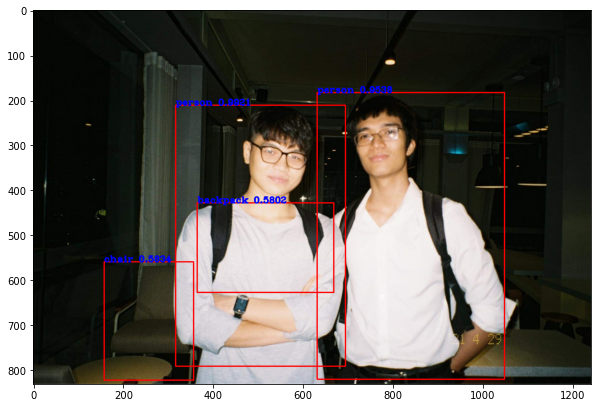

In [16]:
boxes, scores, classes, nums = yolo(input_img)

logging.info('detections:')
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                               np.array(scores[0][i]),
                               np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 20))
plt.imshow(prediction_img)